In [1]:
from memory import Memory, CyclicCache, LRUCache, RandomCache
import random

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<h3>Define some functions<h3>

In [3]:
def reset():
    global lru_l
    global cyclic_l
    global random_l
    lru_l = []
    cyclic_l = []
    random_l = []
'''
n1 is the number of test time
n2 is length of test_data
n3 is the additional parameter size=n3(the default is 4)
rangemax is the random chosen range maximun number (range:(0, rangemax))
'''
def testing(n1, n2, n3, rangemax):
    global lru_smallest
    global cyclic_smallest
    global random_smallest
    lru_smallest=0
    cyclic_smallest=0
    random_smallest=0
    for i in range(n1):
        test_data = []
        for i in range(n2): 
            test_data.append(random.randrange(rangemax)) 
        mem = Memory()
        for datum in test_data:
            mem.lookup(datum)

        lru = LRUCache(size=n3)
        for datum in test_data:
            lru.lookup(datum)

        cyclic = CyclicCache(size=n3)
        for datum in test_data:
            cyclic.lookup(datum)

        Random = RandomCache(size=n3)
        for datum in test_data:
            Random.lookup(datum)

        a1 = lru.get_hit_count()
        a2 = cyclic.get_hit_count()
        a3 = Random.get_hit_count()
        
        if a1 < a2:
            if a1 < a3:
                lru_smallest+=1
            elif a1 > a3:
                random_smallest+=1
            else:
                lru_smallest+=1
                random_smallest += 1
        elif a1 > a2:
            if a2 > a3:
                random_smallest+=1
            elif a2 < a3:
                cyclic_smallest+=1
            else:
                random_smallest+=1
                cyclic_smallest+=1
        else:
            if a1 < a3:
                lru_smallest+=1
                cyclic_smallest+=1
            elif a1 > a3:
                random_smallest+=1
            else:
                lru_is_smallest+=1
                cyclic_is_smallest+=1
                random_is_smallest+=1
        lru_list.append(a1)
        cyclic_list.append(a2)
        random_list.append(a3)
        
    print("Count of lru is smallest:")
    print(lru_is_smallest)
    print("Count of cyclic is smallest:")
    print(cyclic_is_smallest)
    print("Count of random is smallest:")
    print(random_is_smallest)

In [4]:
def visualizing():
    df_dict = {
        'LRU': [lru_is_smallest],
        'Cyclic': [cyclic_is_smallest],
        'Random': [random_is_smallest]
    }
    data=pd.DataFrame(df_dict)
    data.index=['Count']
    return data

In [5]:
def pie_shown():
    plt.figure(figsize=(6,4))
    plt.title('number of smallest occurrences')
    df=visualizing().T
    print(df)
    lst_explode=[0.025]*3
    plt.pie(df['Count'], explode=lst_explode, shadow = True, startangle=90, autopct='% .0f %%')
    plt.legend(labels=df.index, loc='best')
    # plt.axis('equal')
    plt.show()

<h3>Experiment1<h3>

Count of lru is smallest:
705
Count of cyclic is smallest:
706
Count of random is smallest:
763
        Count
LRU       705
Cyclic    706
Random    763


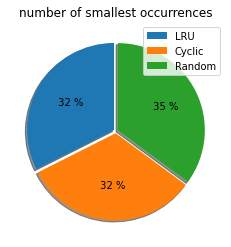

In [7]:
reset()
testing(1000, 10, 4, 8)
pie_shown()

<h3>Experiment2<h3>

Count of lru is smallest:
485
Count of cyclic is smallest:
423
Count of random is smallest:
526
        Count
LRU       485
Cyclic    423
Random    526


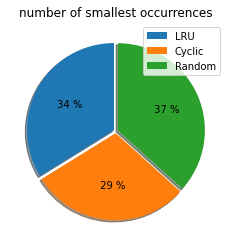

In [8]:
reset()
testing(1000, 20, 4, 8)
pie_shown()

<h3>Experiment3<h3>

Count of lru is smallest:
981
Count of cyclic is smallest:
976
Count of random is smallest:
973
        Count
LRU       981
Cyclic    976
Random    973


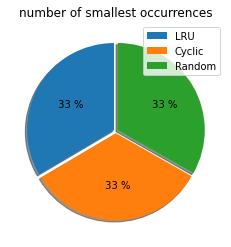

In [9]:
reset()
testing(1000, 10, 6, 8)
pie_shown()

<h3>Experiment4<h3>

Count of lru is smallest:
798
Count of cyclic is smallest:
796
Count of random is smallest:
789
        Count
LRU       798
Cyclic    796
Random    789


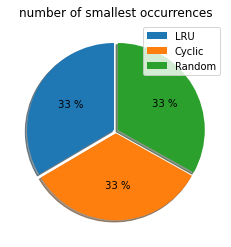

In [10]:
reset()
testing(1000, 10, 4, 20)
pie_shown()

<h3>Conclusion<h3>

Comparing experiment1 and 2, we know that the hit count will decrease as the size of test_data increases.

Comparing experiment1 and 3, we know that the hit count will increase as the size of cache increases.

Comparing experiment1 and 4, we know that the hit count will increase as the range maximum number increases.